## Хлюстов И.А. 381908-1


## 24. Разделимые наименьшие квадраты

[Каханер–Моулер–Нэш] 

Пусть необходимо аппроксимировать $m$ точек данных $(t_i,\, y_i)$ $(i=1,2,\dots,m)$ с помощью функции
$$
   b(t) = c_1 + c_2 t + c_3 t^2 + c_4 e^{\lambda t}.
$$
Параметры $c_1,\dots,c_4$ входят линейно, а $\lambda$ нелинейно.
Рассмотрим матрицу
$$
A(\lambda) =
\left(
\begin{array}{cccc}
    1 & t_1 & t_1^2 & e^{\lambda t_1}  \\
    1 & t_2 & t_2^2 & e^{\lambda t_2}  \\
    \vdots & \vdots & \vdots & \vdots  \\
    1 & t_m & t_m^2 & e^{\lambda t_m}  \\
\end{array}
\right)
$$
и векторы
$$
y = 
\left(
\begin{array}{c}
   y_1 \\ y_2 \\ \vdots \\ y_m
\end{array}
\right),
\qquad
c = 
\left(
\begin{array}{c}
   c_1 \\ c_2 \\ c_3\\ c_4
\end{array}
\right).
$$
Тогда задачу наименьших квадратов можно поставить следующим образом:
$$
\min_{\lambda}  \min_{c}  \|A(\lambda) c - y\|_2.
$$
Для любого заданного $\lambda$ внутренний минимум можно найти линейным методом наименьших квадратов.
Для нахождения внешнего минимума можно воспользоваться методом одномерной минимизации.

В таблице ниже приведены две группы данных, к которым необходимо применить описанный подход.
Единственным ли образом определяются неизвестные параметры?
Изобразите данные на графике и постройте графики построенных моделей.

```
       t        y         y
             Группа 1  Группа 2
 -----------------------------------
     0.00     20.00     20.00
     0.25     51.58     24.13
     0.50     68.73     26.50
     0.75     75.46     27.13
     1.00     74.36     26.00
     1.25     67.09     23.13
     1.50     54.73     18.50
     1.75     37.98     12.13
     2.00     17.28      4.00
```

In [234]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt

In [235]:
m = 9

x_test = np.arange(0, 2.01, 0.25, dtype = float)

y_test1 = np.array([
    20.00,
    51.58,     
    68.73,     
    75.46,     
    74.36,     
    67.09,     
    54.73,     
    37.98,     
    17.28,      
])

y_test2 = np.array([
    20.00,
    24.13,
    26.50,
    27.13,
    26.00,
    23.13,
    18.50,
    12.13,
    4.00,
])

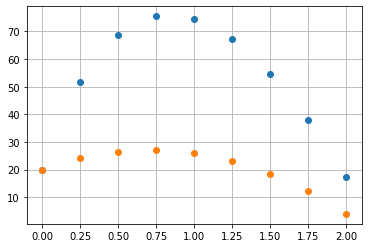

In [236]:
#Посмотрим распределение данных на графике
plt.grid()
plt.plot(x_test, y_test1, 'o')
plt.plot(x_test, y_test2, 'o')

In [237]:
#---------------------------------Все необходимые функции для метода разделимых наименьших квадратов----------------------------

def f(_lambda, C, x):
    return C[0] + C[1] * x + C[2] * (x ** 2) + C[3] * (np.e ** (_lambda * x))

#Метод наименьших квадратов
def get_lstsq(_lambda, y_test):
    #Создаём матрицу
    A =  np.ones((m, 4), dtype=float)
    A[:, 1] = x_test
    A[:, 2] = x_test ** 2
    A[:, 3] = np.e ** (_lambda * x_test)
    
    #Используем метод наименьших квадратов
    return np.linalg.lstsq(A, y_test)[0]

#Вычисление функции, которую надо минимизировать по обеим выборкам
def solve_1(_lambda):    
    C = get_lstsq(_lambda, y_test1)

    #Выячисляем значения функции на нашей выборке
    y_approxymated = f(_lambda, C, x_test)

    return np.sum((y_approxymated - y_test1) ** 2)

def solve_2(_lambda):    
    C = get_lstsq(_lambda, y_test2)

    #Выячисляем значения функции на нашей выборке
    y_approxymated = f(_lambda, C, x_test)

    return np.sum((y_approxymated - y_test2) ** 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


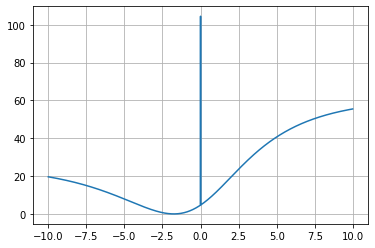

In [238]:
#Отобразим на графике значения функции, которую нам надо минимизировать в методе наименьших квадратов в зависимости от lambda
x_graph = np.arange(-10.0, 10.0, .01, dtype = float)
y_graph = []
for x in x_graph:
    y_graph.append(solve_1(x))
    
plt.grid()
plt.plot(x_graph, y_graph)

# Как можно заметить из графика -- существует минимум функции на определённом интервале.
# Далее найдём этот минимум методом одномерной оптимизации.
#

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


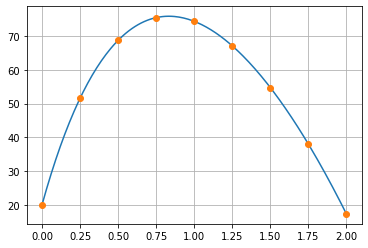

In [239]:
from scipy.optimize import minimize_scalar

_lambda = minimize_scalar(solve_1, bounds=[-10, 10], method='bounded')['x']

x_valid1 = np.arange(0, 2.01, 0.01, dtype = float)
C_result = get_lstsq(_lambda, y_test1)
y_valid1 = f(_lambda, C_result, x_valid)

#Отобразим саму выборку и аппроксимацию выборки на графике 
plt.grid()
plt.plot(x_valid1, y_valid1)
plt.plot(x_test, y_test1, 'o')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


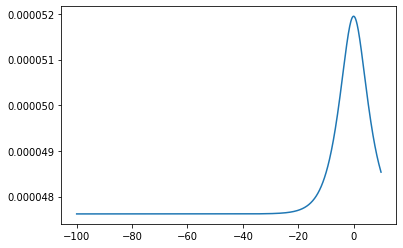

In [240]:
#Отобразим на графике значения функции, которую нам надо минимизировать в методе наименьших квадратов в зависимости от lambda(выборка 2)
x_graph = np.arange(-100, 10, .1, dtype = float)
y_graph = []
for x in x_graph:
    y_graph.append(solve_2(x))
    
plt.plot(x_graph, y_graph)

In [241]:
# Как можно заметить, функция бесконечно возрастсает на отрезке (-inf; что-то, что я не посчитал(вроде не бы не так важно)).
# Тогда возьмём за _lambda -100, весомого улучшения аппрокисмации не будет.
#

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


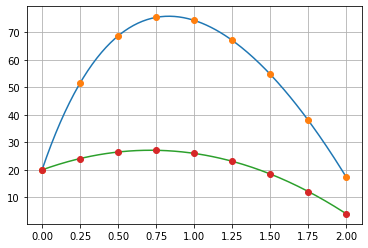

In [242]:
_lambda = -100

x_valid2 = np.arange(0, 2.01, 0.01, dtype = float)
C_result = get_lstsq(_lambda, y_test2)
y_valid2 = f(_lambda, C_result, x_valid)

#Теперь отобразим на графике обе выборки и их аппроксимации
plt.grid()
plt.plot(x_valid1, y_valid1)
plt.plot(x_test, y_test1, 'o')
plt.plot(x_valid2, y_valid2)
plt.plot(x_test, y_test2, 'o')

In [ ]:
# В первой функции минимум определяется единственным образом, т.к. у внешней функции существет определённый минимум.
# Во второй функции ситуация изменилась, внешняя функция возрастает на промежутке (-inf; x)
# и точный минимум найти невозможно, можно лишь найти приближение, что мы и сделали.